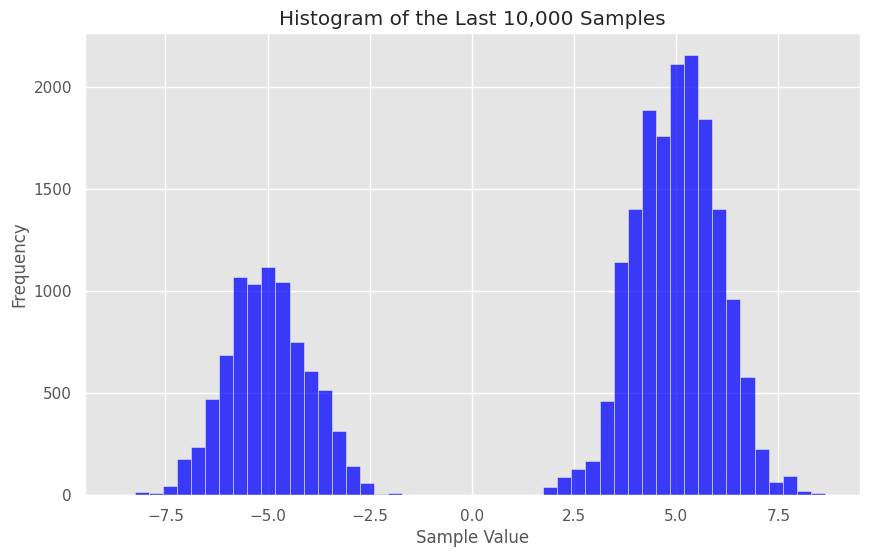

In [27]:
import numpy as np
from scipy.stats import norm
import random

import matplotlib.pyplot as plt

def bimodal_mixture(x):
    w1 = 1/3
    mu1, mu2 = -5, 5
    sigma1, sigma2 = 1, 1
    return w1 * norm.pdf(x, mu1, sigma1) + (1 - w1) * norm.pdf(x, mu2, sigma2)

def differential_evolution_mc_sampling(x, iterations=2500):
    N, D = x.shape
    gamma = 2.4 / np.sqrt(2 * D)  # Adjust gamma as per the recommended value
    history = []

    for i in range(iterations):
        for j in range(N):
            a, b = np.random.choice([k for k in range(N) if k != j], 2, replace=False)
            mutant = x[j] + gamma * (x[a] - x[b])  # Adjust mutation step using gamma
            crossover = (np.random.rand(D) < 0.5)
            candidate = np.where(crossover, mutant, x[j])

            if np.random.rand() < (bimodal_mixture(candidate) / bimodal_mixture(x[j])):
                x[j] = candidate
            
        history.append(x.copy())

    return np.array(history)

# Initialize parameters
N = 10  # number of chains
D = 1   # dimension of the parameter space
x = np.random.uniform(-10, 10, (N, D))  # Wider initial range to cover both modes

# Run the sampling DE-MC algorithm
samples = differential_evolution_mc_sampling(x, 2500)
# Extract and flatten the last 10,000 samples, discarding the first 15,000
final_samples = samples[15:].reshape(-1)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(final_samples, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of the Last 10,000 Samples')
plt.xlabel('Sample Value')
plt.ylabel('Frequency')
plt.show()




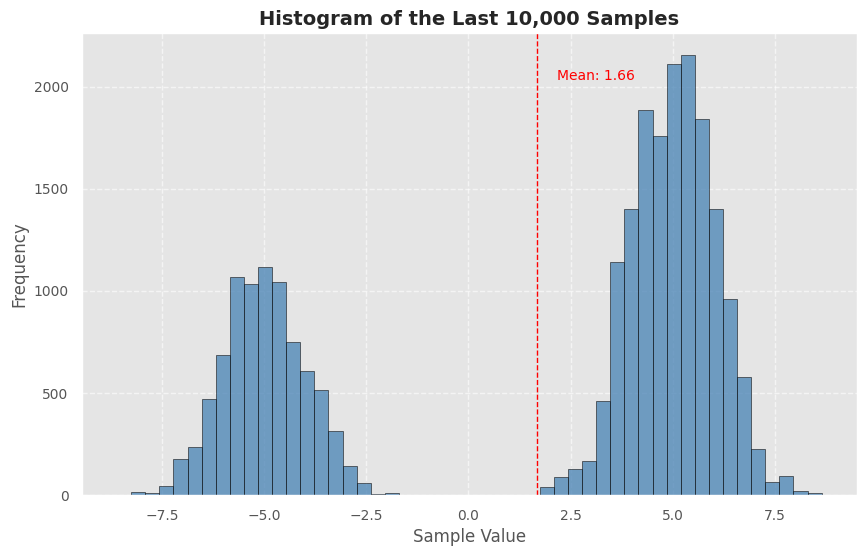

In [28]:

# Set a style
plt.style.use('ggplot')  # You can choose styles like 'ggplot', 'seaborn-dark', 'classic', etc.

# Create a figure with size and resolution
plt.figure(figsize=(10, 6), dpi=100)

# Plot the histogram
n, bins, patches = plt.hist(final_samples, bins=50, alpha=0.75, color='steelblue', edgecolor='black')

# Adding a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Title and labels with increased font size for better readability
plt.title('Histogram of the Last 10,000 Samples', fontsize=14, fontweight='bold')
plt.xlabel('Sample Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize tick params
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Highlight mean or other important values
mean_value = np.mean(final_samples)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_value + 0.5, plt.ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', color = 'red')

# Show the plot
plt.show()


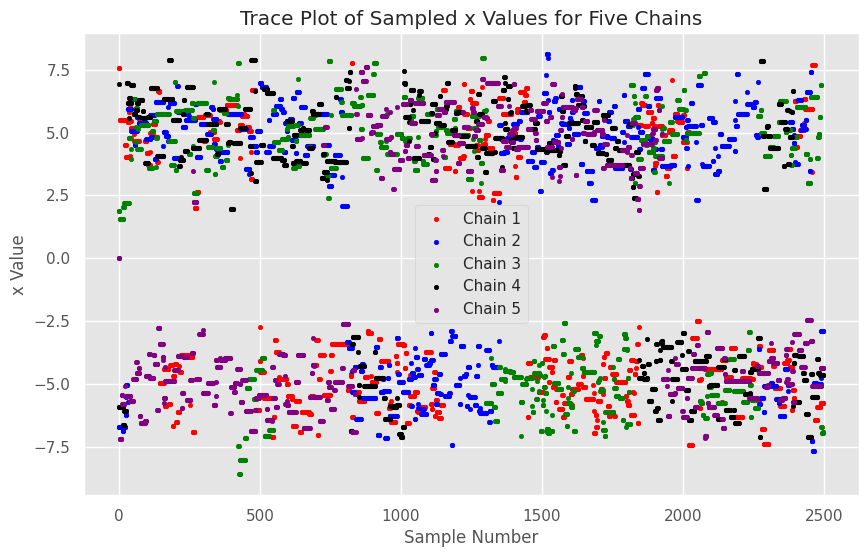

In [29]:
# Trace plots for five of the ten chains
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'black', 'purple']
for i in range(5):
    plt.scatter(range(2500), samples[:, i], color=colors[i], s=10, label=f'Chain {i+1}')
plt.title('Trace Plot of Sampled x Values for Five Chains')
plt.xlabel('Sample Number')
plt.ylabel('x Value')
plt.legend()
plt.show()


/home/jovyan/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


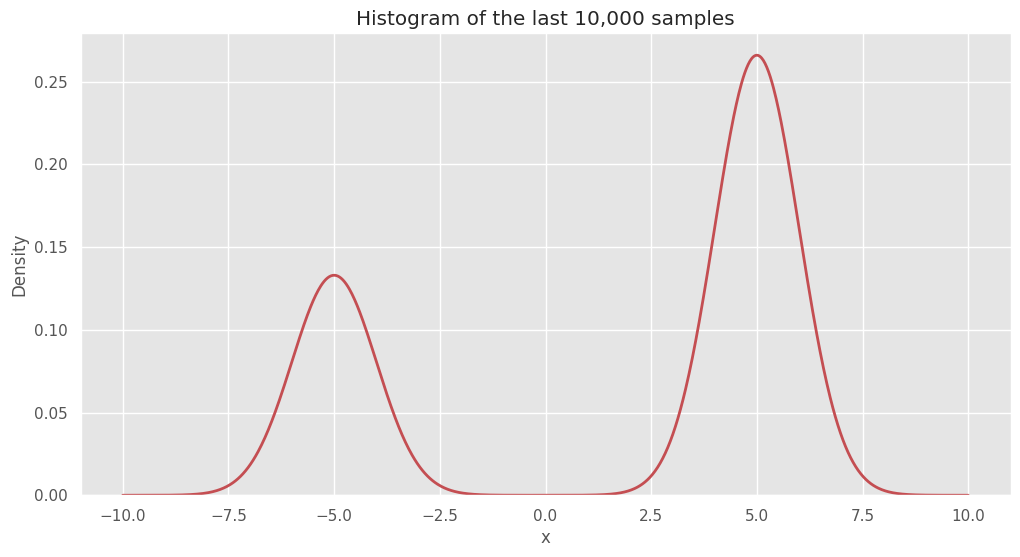

In [30]:


# Define the bimodal mixture distribution
def bimodal_mixture(x):
    w1 = 1/3
    mu1, mu2 = -5, 5
    sigma1, sigma2 = 1, 1
    return w1 * norm.pdf(x, mu1, sigma1) + (1 - w1) * norm.pdf(x, mu2, sigma2)

# DE-MC variant parameters
N = 10  # Number of chains
max_evals = 25000  # Maximum function evaluations
samples_per_chain = max_evals // N  # Samples per chain

# Initialize chains
chains = np.zeros((N, samples_per_chain))
x0 = np.random.uniform(-10, 10, N)  # Initial points for each chain

# DE-MC sampling
for i in range(samples_per_chain):
    for j in range(N):
        # Propose a new sample
        k, l = np.random.choice(np.delete(np.arange(N), j), 2, replace=False)
        proposal = chains[j, i-1] + np.random.uniform(0.5, 1.0) * (chains[k, i-1] - chains[l, i-1])
        
        # Metropolis-Hastings acceptance criterion
        if np.random.rand() < min(1, bimodal_mixture(proposal) / bimodal_mixture(chains[j, i-1])):
            chains[j, i] = proposal
        else:
            chains[j, i] = chains[j, i-1]

# Discard the first 15,000 samples and combine the rest
combined_samples = chains[:, 15000:].flatten()

# Plot (a) Histogram of the last 10,000 samples
plt.figure(figsize=(12, 6))
plt.hist(combined_samples, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(-10, 10, 1000)
plt.plot(x, bimodal_mixture(x), 'r-', lw=2)
plt.title('Histogram of the last 10,000 samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()



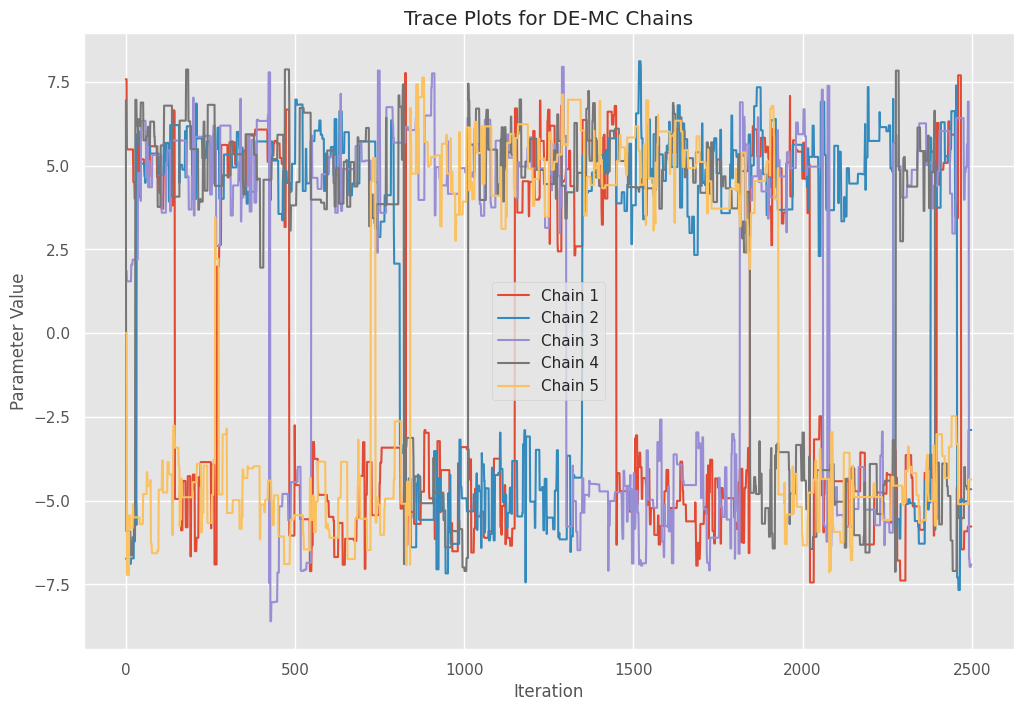

In [31]:

def plot_trace(samples, chain_ids, max_iter):
    plt.figure(figsize=(12, 8))
    for i in chain_ids:
        plt.plot(range(max_iter), samples[:, i], label=f'Chain {i+1}')
    plt.title('Trace Plots for DE-MC Chains')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter Value')
    plt.legend()
    plt.show()


plot_trace(samples, chain_ids=[0, 1, 2, 3, 4], max_iter=2500)


Sample Mean (m12): -1.0162
Sample Variance (s12^2): 25.1817


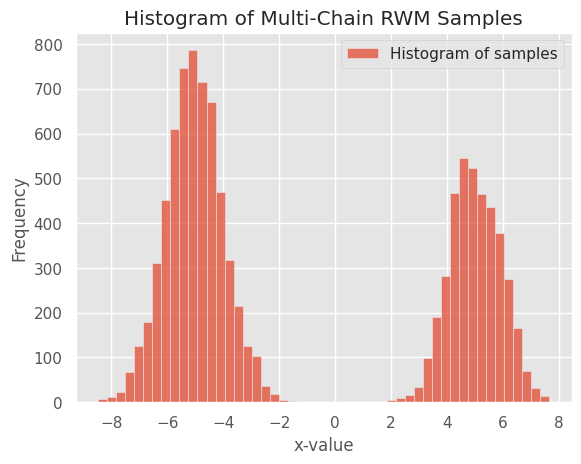

In [32]:
# JUST TESTING WITH MULTIPLE CHAINS FOR PROBLEM 3 !!!!!!!! SHOULD WORK!  

# Parameters
w1 = 1/3
mu1 = -5
mu2 = 5
sigma1 = 1
sigma2 = 1
T = 2500  # Total iterations per chain
num_chains = 10  # Number of chains
burn_in = 1500

# Mixture density function
def mixture_density(x):
    return w1 * norm.pdf(x, mu1, sigma1) + (1 - w1) * norm.pdf(x, mu2, sigma2)

# Random Walk Metropolis algorithm for multiple chains
def random_walk_metropolis_multi_chain(T, burn_in, num_chains):
    all_samples = []
    for chain in range(num_chains):
        x = random.uniform(-10, 10)  # Initialize differently for each chain
        samples = np.zeros(T)
        for t in range(T-1):
            x_new = x + random.uniform(-1, 1)  # Slightly wider proposal
            acceptance_ratio = mixture_density(x_new) / mixture_density(x)
            if random.random() < acceptance_ratio:
                x = x_new
            samples[t+1] = x
        all_samples.append(samples[burn_in:])
    return np.concatenate(all_samples)

# Run RWM for multiple chains and get samples
samples = random_walk_metropolis_multi_chain(T, burn_in, num_chains)

# Extract the last samples for analysis
final_samples = samples[-10000:]

# Calculate the sample mean and variance
sample_mean = np.mean(final_samples)
sample_variance = np.var(final_samples)

# Display the calculated sample mean and variance
print(f"Sample Mean (m12): {sample_mean:.4f}")
print(f"Sample Variance (s12^2): {sample_variance:.4f}")

# Plot histogram of the samples
plt.hist(final_samples, bins=50, alpha=0.75, label='Histogram of samples')
plt.title('Histogram of Multi-Chain RWM Samples')
plt.xlabel('x-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
